In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re
import os.path

In [ ]:
def load_movies(path2data): # 1 classe par répertoire
    allmovtxts = [] # init vide
    allmovlabs = []
    cpt = -1
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data+cl):
            movtxt = open(path2data+cl+'/'+f).read()
            allmovtxts.append(movtxt)
            allmovlabs.append(cpt)
        cpt+=2 # chg répertoire = cht classe
        
    return allmovtxts,allmovlabs


def load_movietest(testfile):
    realmovtesttxts = []
    realmovtestlabs = []
    s=codecs.open(testfile, 'r','utf-8') 
    rmt=s.read()
    rmtt=rmt.split('\n')
    realmovtesttxts=np.array(rmtt)
    print(len(realmovtesttxts))
    realmovtestlabs=[0]*len(realmovtesttxts)
    return realmovtesttxts,realmovtestlabs


In [ ]:
path = "C:/Users/jacqueno/Documents/IODAA/Cours_IODAA/cours_ONTOTAL/TAL/tuto_TAL-main/notebooks/ressources/movies/movies1000/"
testfile="C:/Users/jacqueno/Documents/IODAA/Cours_IODAA/cours_ONTOTAL/TAL/tuto_TAL-main/notebooks/ressources/movies/testSentiment.txt"

allmovtxts,allmovlabs = load_movies(path)
realmovtesttxts,realmovtestlabs=load_movietest(testfile)



25001


In [ ]:
print(len(allmovtxts),len(allmovlabs))
print(allmovtxts[0])
print(allmovlabs[0])
print(allmovtxts[-1])
print(allmovlabs[-1])

print(len(realmovtesttxts),len(realmovtestlabs))
print(realmovtesttxts[0])
print(realmovtestlabs[0])
print(realmovtesttxts[-2])
print(realmovtestlabs[-2])

2000 2000
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , 

# Transformation paramétrique du texte

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

In [ ]:
# import unicodedata
# import string

# punc = string.punctuation  
# punc += '\n\r\t'

# for i in range(len(allmovtxts)):
#     allmovtxts[i]= allmovtxts[i].lower()
#     allmovtxts[i] = (allmovtxts[i]).translate(str.maketrans(punc, ' ' * len(punc)))  
#     allmovtxts[i] = re.sub('[0-9]+', '', allmovtxts[i])
#     allmovtxts[i] = unicodedata.normalize('NFD', allmovtxts[i]).encode('ascii', 'ignore').decode('utf-8')
# print(allmovtxts[500])
# print(allmovtxts[1500])


# for i in range(len(realmovtesttxts)):
#     realmovtesttxts[i]= realmovtesttxts[i].lower()
#     realmovtesttxts[i] = (realmovtesttxts[i]).translate(str.maketrans(punc, ' ' * len(punc)))  
#     realmovtesttxts[i] = re.sub('[0-9]+', '', realmovtesttxts[i])
#     realmovtesttxts[i] = unicodedata.normalize('NFD', realmovtesttxts[i]).encode('ascii', 'ignore').decode('utf-8')
# print(realmovtesttxts[500:502])


In [ ]:
# only one split between train/test
from sklearn.model_selection import train_test_split

traintxts, testtxts, trainlabs, testlabs = train_test_split(allmovtxts, allmovlabs, test_size=0.3, random_state=0) 
print(len(traintxts))
print(len(testtxts))

1400
600


# Extraction du vocabulaire

Exploration préliminaire des jeux de données.

- Quelle est la taille d'origine du vocabulaire?
- Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
- Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
- Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
- Quelle est la distribution d'apparition des mots (Zipf)
- Quels sont les 100 bigrammes/trigrammes les plus fréquents?


['00' '000' '0009f' '007' '00s' '03' '04' '05' '05425' '10' '100' '1000'
 '100m' '101' '102' '103' '104' '105' '106' '107']
(34438,)
[(',', 54045), ('the', 47729), ('.', 45894), ('a', 25713), ('and', 23621), ('of', 23343), ('to', 21775), ('is', 17424), ('in', 14011), ('"', 12211), ('that', 10317), (')', 8165), ('(', 8109), ('it', 7315), ('as', 7213), ('with', 7186), ('for', 6553), ('film', 6213), ('his', 6182), ('this', 5529), ('\nthe', 5419), ('are', 4831), ('on', 4790), ('but', 4723), ('he', 4257), ('be', 4178), ('by', 4147), ('i', 3856), ('an', 3843), ('movie', 3800), ('who', 3678), ('not', 3618), ('one', 3528), ('was', 3431), ('have', 3355), ('from', 3349), ('has', 3230), ('at', 3163), ('her', 3038), ('all', 2821), ('you', 2770), ('they', 2641), ('?', 2641), ('\n', 2569), ('about', 2428), ('out', 2405), ('like', 2335), ('more', 2272), ('so', 2162), ('up', 2157), ('their', 2143), (':', 2127), ('which', 2097), ('or', 2043), ('just', 1943), ('some', 1935), ('into', 1837), ('him', 1825

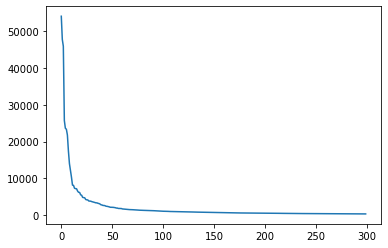

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(input='content', encoding='utf-8',
#                              decode_error='strict', strip_accents=None,
#                              lowercase=True, preprocessor=None, tokenizer=None,
#                              stop_words=None, token_pattern='(?u)\b\w\w+\b',
#                              ngram_range=(1, 1), analyzer='word',
#                              max_df=1.0, min_df=1, max_features=None,
#                              vocabulary=None, binary=False, dtype='numpy.int64')

# counvectorizer options par défaut : 
vectorizer_0 = CountVectorizer()
Traintxts_0 = vectorizer_0.fit_transform(traintxts)
print(vectorizer_0.get_feature_names_out()[:20]) # we only print a few
dic_size = np.shape(Traintxts_0.toarray()[1])
print(dic_size)

# liste des mots les plus fréquents 
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
wc = Counter()
for word in (traintxts):
    wc.update(word.split(" "))
   
freq = [f for w,f in wc.most_common(300)]
plt.plot(freq[:300])
print(wc.most_common(100))
mostfreq=np.array((wc.most_common(100)))
print(mostfreq[:,0])
# définir la liste des 100 mots les plus fréquents pour les mettre dans stop words
array_sw=mostfreq[:,0]
list_sw=array_sw.tolist()
print(len(list_sw))

# Tester différents countvectorizers: enlever des stop words, jouer sur la taille du dictionnaire avec max_df  
vectorizer_0 = CountVectorizer()
Traintxts_0 = vectorizer_0.fit_transform(traintxts)
print(vectorizer_0.get_feature_names_out()[:20]) # we only print a few
dic_size = np.shape(Traintxts_0.toarray()[1])
print(dic_size)

vectorizer_1 = CountVectorizer(stop_words=list_sw) #enlever comme stopwords les 100 mots les plus fréquents
Traintxts_1 = vectorizer_1.fit_transform(traintxts)
print(vectorizer_1.get_feature_names_out()[:20]) # we only print a few
dic_size = np.shape(Traintxts_1.toarray()[1])
print(dic_size)

vectorizer_2 = CountVectorizer(max_df=0.005, min_df=7) #tester plusieurs valeurs de max_df min_df
Traintxts_2 = vectorizer_2.fit_transform(traintxts)
dic_size = np.shape(Traintxts_2.toarray()[1])
print(vectorizer_2.get_feature_names_out()[:20]) 
print(dic_size)

Question qui devient de plus en plus intéressante avec les approches modernes:
est-il possible d'extraire des tri-grammes de lettres pour représenter nos documents?

Quelle performances attendrent? Quels sont les avantages et les inconvénients d'une telle approche?

# Modèles de Machine Learning

Avant de lancer de grandes expériences, il faut se construire une base de travail solide en étudiant les questions suivantes:

- Combien de temps ça prend d'apprendre un classifieur NB/SVM/RegLog sur ces données en fonction de la taille du vocabulaire?
- La validation croisée est-elle nécessaire? Est ce qu'on obtient les mêmes résultats avec un simple *split*?
- La validation croisée est-elle stable? A partir de combien de fold (travailler avec différentes graines aléatoires et faire des statistiques basiques)?

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# from sklearn.model_selection import cross_val_score

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(Traintxts_2, trainlabs)

# #Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
lr_clf.fit(Traintxts_2, trainlabs)

# #Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(Traintxts_2, trainlabs)

Testtxts = vectorizer_2.transform(testtxts)
true=testlabs
yhat_nb = nb_clf.predict(Testtxts)
yhat_lr=lr_clf.predict(Testtxts) 
yhat_svm=svm_clf.predict(Testtxts)


print(f"Naïve Bayes accuracy: {accuracy_score(true, yhat_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(true, yhat_lr)}")
print(f"SVM accuracy: {accuracy_score(true, yhat_svm)}")

print(f"Naïve Bayes recall: {recall_score(true, yhat_nb)}")
print(f"Logistic Regression recall: {recall_score(true, yhat_lr)}")
print(f"SVM recall: {recall_score(true, yhat_svm)}")


# print(true[:20])
# print(yhat_nb[:20])
# print(yhat_lr[:20])
# print(yhat_svm[:20])


Naïve Bayes accuracy: 0.825
Logistic Regression accuracy: 0.8483333333333334
SVM accuracy: 0.835
Naïve Bayes recall: 0.8321917808219178
Logistic Regression recall: 0.863013698630137
SVM recall: 0.8424657534246576


## Première campagne d'expériences

Les techniques sur lesquelles nous travaillons étant sujettes au sur-apprentissage: trouver le paramètre de régularisation dans la documentation et optimiser ce paramètre au sens de la métrique qui vous semble la plus appropriée (cf question précédente).

In [ ]:
import copy

# after selection of the classifier and performance on validation set, predict for Real test 
# Real_test = vectorizer_2.transform(realmovtesttxts)
# ypred_real_test = nb_clf.predict(Real_test)
# print(ypred_real_test[:100])
# pred_real_test= ypred_real_test.astype(np.float)
# lignes_positive=np.where(pred_real_test==1.0, 1, 0)
# lignes_negative=np.where(pred_real_test==-1.0, 1, 0)
# print(np.sum(lignes_positive))
# print(np.sum(lignes_negative))
# print(np.shape(realmovtestlabs)) 
# for i in range ((np.shape(realmovtesttxts)[0])-1):
#     realmovtestlabs[i]=pred_real_test[i]
# realmovtestlabs[25000]=0
# print(realmovtestlabs[:20])
# np.savetxt('test_movies_prediction.txt', realmovtestlabs)
